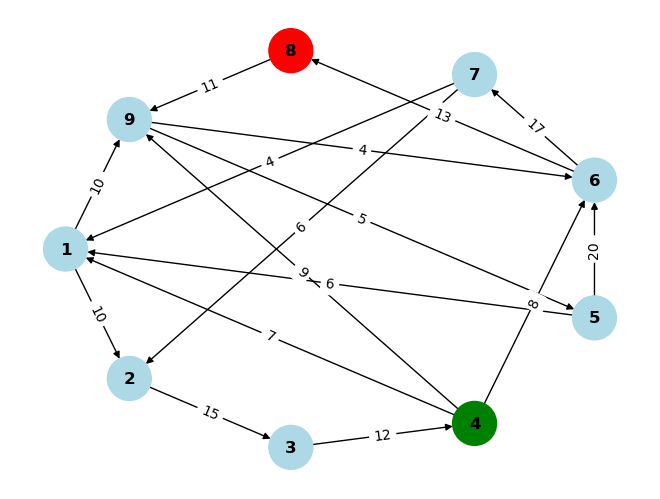

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
graph = nx.DiGraph()
nodes_edges_values = [
    ["1", [["2", 10], ["9", 10]]],
    ["2", [["3", 15]]],
    ["3", [["4", 12]]],
    ["4", [["1", 7], ["6", 8], ["9", 9]]],
    ["5", [["1", 6], ["6", 20]]],
    ["6", [["7", 17], ["8", 13]]],
    ["7", [["1", 4], ["2", 6]]],
    ["8", [["9", 11]]],
    ["9", [["5", 5], ["6", 4]]],
]
start_node = "8"
end_node = "4"

for node_edge_value in nodes_edges_values:
    graph.add_node(node_edge_value[0])
for node_edge_value in nodes_edges_values:
    for edge_value in node_edge_value[1]:
        graph.add_edge(node_edge_value[0], edge_value[0], weight=edge_value[1])

# Draw the graph
pos = nx.shell_layout(graph)
nx.draw(
    graph,
    pos,
    with_labels=True,
    node_size=1000,
    font_weight="bold",
    arrows=True,
    node_color=["red" if node == start_node else "green" if node == end_node else "lightblue" for node in graph.nodes()],
)

# Add edge labels
labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

# Display the graph
plt.show()

In [12]:
import math
from tabulate import tabulate

lambda_values = []


def print_lambda_table(lambda_values):
    n = len(lambda_values)
    headers = [""] + ["x" + str(i) for i in range(1, n + 1)]
    values_row = ["λ"] + [str(value) for value in lambda_values]
    table = [values_row]
    print(
        tabulate(table, headers, tablefmt="grid", numalign="center", stralign="center")
    )


def print_iteration_table(iteration_table):
    headers = ["xixj", "vij", "λj - λi", "Answer", "λj changed"]
    table = iteration_table
    print(
        tabulate(table, headers, tablefmt="grid", numalign="center", stralign="center")
    )

In [13]:
# iterations
iteration = 0

print("I" + str(iteration))
iteration += 1
for node_edge_value in nodes_edges_values:
    if node_edge_value[0] == start_node:
        result = 0
    else:
        result = math.inf
    lambda_values.append(result)
print_lambda_table(lambda_values)

no_changes_made = 0
while not no_changes_made:
    print("I" + str(iteration))
    no_changes_made = 1
    iteration_table = []
    for node_edge_value in nodes_edges_values:
        for edge_value in node_edge_value[1]:
            source = node_edge_value[0]
            destination = edge_value[0]
            weight = edge_value[1]
            # inf - inf and other impossible operation are represented by nan
            answer = "?"
            new_lambda = "-"
            operation_result = (
                lambda_values[int(destination) - 1] - lambda_values[int(source) - 1]
            )
            if not math.isnan(operation_result):
                if operation_result < weight:
                    answer = "< " + str(weight)
                elif operation_result == weight:
                    new_lambda = "*"
                else:
                    answer = "> " + str(weight)
                    lambda_values[int(destination) - 1] = (
                        lambda_values[int(source) - 1] + weight
                    )
                    new_lambda = str(lambda_values[int(destination) - 1])
                    no_changes_made = 0
            iteration_table.append(
                [
                    "x" + source + "x" + destination,
                    weight,
                    operation_result,
                    answer,
                    new_lambda,
                ]
            )
    iteration += 1
    print_lambda_table(lambda_values)
    print_iteration_table(iteration_table)

I0
+----+------+------+------+------+------+------+------+------+------+
|    |  x1  |  x2  |  x3  |  x4  |  x5  |  x6  |  x7  |  x8  |  x9  |
+====+======+======+======+======+======+======+======+======+======+
| λ  | inf  | inf  | inf  | inf  | inf  | inf  | inf  |  0   | inf  |
+----+------+------+------+------+------+------+------+------+------+
I1
+----+------+------+------+------+------+------+------+------+------+
|    |  x1  |  x2  |  x3  |  x4  |  x5  |  x6  |  x7  |  x8  |  x9  |
+====+======+======+======+======+======+======+======+======+======+
| λ  | inf  | inf  | inf  | inf  |  16  |  15  | inf  |  0   |  11  |
+----+------+------+------+------+------+------+------+------+------+
+--------+-------+-----------+----------+--------------+
|  xixj  |  vij  |  λj - λi  |  Answer  |  λj changed  |
+========+=======+===========+==========+==============+
|  x1x2  |  10   |    nan    |    ?     |      -       |
+--------+-------+-----------+----------+--------------+
|  x1x9  

In [14]:
headers = []
table = [[]]
new_graph = []  # this will keep all the new routes
for operation in iteration_table:
    if operation[4] == "*":
        nodes = operation[0].split("x")
        headers.append("x" + nodes[1])
        table[0].append("x" + nodes[2])
        found = 0
        found_position = 0
        for node in new_graph:
            found_position += 1
            if node[0] == nodes[1]:
                found = 1
                break
        if not found:
            new_graph.append([nodes[1], [[nodes[2], operation[1]]]])
        else:
            new_graph[found_position - 1][1].append([nodes[2], operation[1]])
print("solution")
print(tabulate(table, headers, tablefmt="grid", numalign="center", stralign="center"))

solution
+------+------+------+------+------+------+------+------+
|  x1  |  x2  |  x3  |  x5  |  x6  |  x8  |  x9  |  x9  |
+======+======+======+======+======+======+======+======+
|  x2  |  x3  |  x4  |  x1  |  x7  |  x9  |  x5  |  x6  |
+------+------+------+------+------+------+------+------+


In [15]:
def recursive_search(graph, origin, target):
    if origin == target:
        return ""
    found_position = 0
    for node in new_graph:
        found_position += 1
        if node[0] == origin:
            break
    for neighbors in graph[found_position - 1][1]:
        return "x" + neighbors[0] + recursive_search(graph, neighbors[0], target)
    return ""  # no path to target

solution is: x8x9x5x1x2x3x4


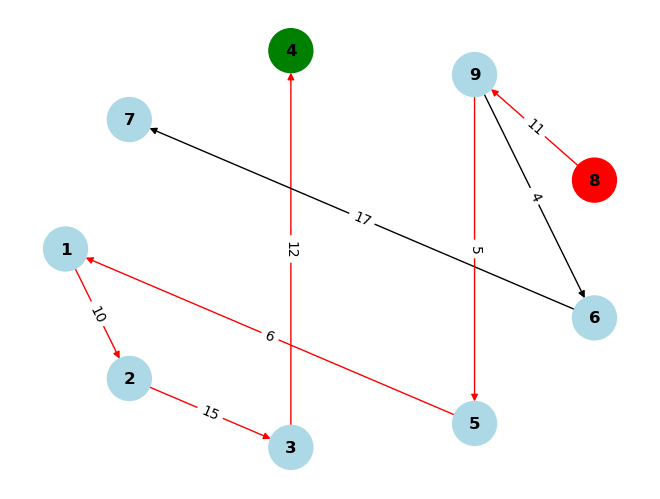

In [16]:
solution = "x" + start_node + recursive_search(new_graph, start_node, end_node)
print("solution is: " + solution)
# Create a directed graph
solution_nodes = solution.split("x")
solution_nodes.pop(0)
graph = nx.DiGraph()
for node_edge_value in new_graph:
    graph.add_node(node_edge_value[0])
for node_edge_value in new_graph:
    for edge_value in node_edge_value[1]:
        graph.add_edge(node_edge_value[0], edge_value[0], weight=edge_value[1])

# Draw the graph
pos = nx.shell_layout(graph)
specific_edge_colors = {}
for i in range(len(solution_nodes) - 1):
    specific_edge_colors[(solution_nodes[i], solution_nodes[i + 1])] = "red"
edge_colors = [specific_edge_colors.get((u, v), "black") for u, v in graph.edges()]

nx.draw(
    graph,
    pos,
    with_labels=True,
    node_color=["red" if node == start_node else "green" if node == end_node else "lightblue" for node in graph.nodes()],
    node_size=1000,
    font_weight="bold",
    arrows=True,
    edge_color=edge_colors,
)
# Add edge labels
labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

# Display the graph
plt.show()